<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/22_ANN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

## MNIST

### Your name :

### Kaggle Link for exercise :
* [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) : 

#### 실습목표<br>
1. 뉴럴넷의 아이디어를 이해한다.
2. keras로 뉴럴넷 모델링이 가능하다!

--------------------------
Rayleigh Kim @ D:plus

## Artificial Neural Network on MNIST

## Library Loading

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers, models

import random as rd

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


### Data Loading & Preparation

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 9402
다음 그림은 숫자 8 입니다.


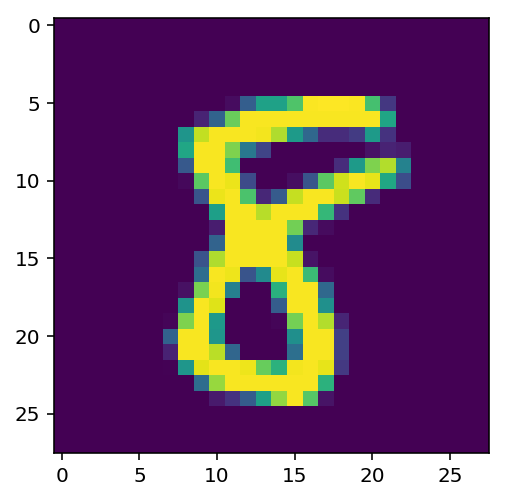

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
plt.imshow(test_x[id])
plt.show()

단순한 로지스틱 회귀, 뉴럴넷은 28x28의 2차원 데이터를 인풋으로 받지 못한다.

이미지[28 by 28] 를 납작한 array [784] 로 바꿔줄 필요가 있다.

In [0]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


이미지의 값이기 때문에 0 ~ 255 사이의 값을 갖는다.

전부 0~1사이의 값을 갖도록 scale을 조정하자!

In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


In [0]:
# One-hot Encoding

train_y = np.eye(10)[train_y]
test_y = np.eye(10)[test_y]

print(test_y[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
train_x.shape

(60000, 784)

### Sequential을 이용하여 모델링을 할거야! (추천)

모델링을 하기 전에!
* 로지스틱 리그레션의 기능을 안다!
* 뉴런의 구조를 안다!
* 뉴럴넷의 구조를 안다.
* 히든레이어 안의 뉴런 하나의 역할을 이해한다.

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()

# 인풋을 받아, weight을 곱하고, bias를 더해주고
# relu까지 씌우는 레이어를 설계하자.
hidden = layers.Dense(64, input_shape=(784,),
                       activation='relu')


# model에 위의 hidden을 layer로 집어 넣자.
model.add(hidden)

# 사실은 다음의 방법처럼 쓰는 것이 간결하다.
# model.add( layers.Dense(128, input_shape=(784,), activation='relu'))


# 앞 레이어의 인풋을 받아 weight을 곱하고, bias를 더해주고
# softmax까지 씌워주는 레이어를 설계하자
# 그리고 model에 집어 넣는 것 까지 해결해보자.

model.add( layers.Dense(10, activation = 'softmax')     )

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])

W0710 07:29:21.658181 140650240837504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0710 07:29:21.662710 140650240837504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0710 07:29:21.684383 140650240837504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 07:29:21.686403 140650240837504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W071

In [0]:
#############################
##       Challenge !       ##
#############################
# 위 코드를 참고하여, 아래의 코드를 수정해보자.
# 더 성능이 좋은 뉴럴넷을 만들어보자.
# 주석을 해제하여 실행한다


# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()
model.add( layers.Dense(16, input_shape=(784,), activation='relu'))
model.add( layers.Dense(16, activation = 'relu')     )
model.add( layers.Dense(10, activation = 'softmax')     )

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])

784개 인풋 -> 16개 히든 레이어 -> 16개 히든 레이어 -> 10개 아웃풋 레이어

keras가 강력한 이유!

내가 설계한 모델을 계층적으로 바로 요약하여 관찰할 수 있다.

In [0]:
#############################
##       Challenge !       ##
#############################
# 위 코드를 참고하여, 아래의 코드를 수정해보자.
# 더 성능이 좋은 뉴럴넷을 만들어보자.
# 주석을 해제하여 실행한다


# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()
model.add( layers.Dense(128, input_shape=(784,), activation='relu'))
model.add( layers.Dense(128, activation = 'relu')     )
model.add( layers.Dense(64, activation = 'relu')     )
model.add( layers.Dense(10, activation = 'softmax')     )

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 100,
                    validation_split = 0.2, verbose=1)


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 70us/step - loss: 0.3195 - acc: 0.9063 - val_loss: 0.1478 - val_acc: 0.9572
Epoch 2/15
48000/48000 [==============================] - 3s 63us/step - loss: 0.1225 - acc: 0.9632 - val_loss: 0.1158 - val_acc: 0.9654
Epoch 3/15
48000/48000 [==============================] - 3s 63us/step - loss: 0.0843 - acc: 0.9742 - val_loss: 0.1057 - val_acc: 0.9692
Epoch 4/15
48000/48000 [==============================] - 3s 64us/step - loss: 0.0619 - acc: 0.9807 - val_loss: 0.0944 - val_acc: 0.9702
Epoch 5/15
48000/48000 [==============================] - 3s 63us/step - loss: 0.0476 - acc: 0.9850 - val_loss: 0.0879 - val_acc: 0.9748
Epoch 6/15
48000/48000 [==============================] - 3s 62us/step - loss: 0.0386 - acc: 0.9878 - val_loss: 0.0873 - val_acc: 0.9739
Epoch 7/15
48000/48000 [==============================] - 3s 64us/step - loss: 0.0325 - acc: 0.9897 - val_loss: 0.0910 - val_acc

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 0s 22us/step
Test Loss : 0.107846,  Test Accuracy : 97.650%


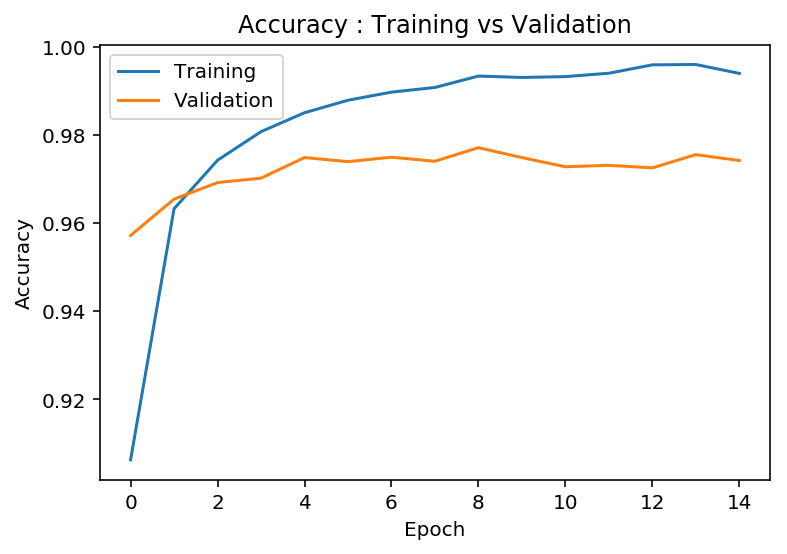

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

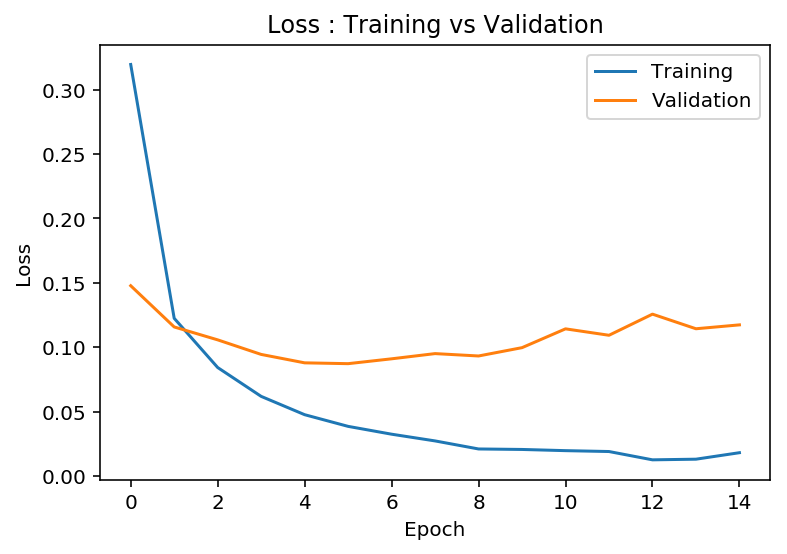

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

과제 :

위에서 epoch의 숫자를 더 늘려서 그래프를 관찰해보자.

데이터를 트레이닝 / 벨리데이션 / 테스트셋으로 나누는 이유를 알아야 한다.

이후 반드시 공부해야 하는 것
* Learning Rate
* Early Stopping

In [0]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)


logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('로지스틱 리그레션')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y.argmax(axis=1)[id]))
print('모델의 예측 : {}'.format(single_pred_test[id]))
print('모델의 카테고리별 확률 : {}'.format(np.floor(pred_test[id]*100)))
if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

In [0]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y.argmax(axis=1)[id]))
print('모델의 예측 : {}'.format(single_pred_test[id]))
print('모델의 카테고리별 확률 : {}'.format(np.floor(pred_test[id]*100)))
if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()